Projeto da Diciplina PROGRAMAÇÃO ESTATÍSTICA COM PYTHON   
Grupo:     
MATHEUS ANTONIO ALVES DE ARAUJO     
NATANAEL FERNANDES SARMENTO     


Os dados obtidos de Covid-19 no brasil apresenta ultima atualização na data de 30/06/2021,  esse dados foram obtidos no site url:https://brasil.io/dataset/covid19/caso_full/. Dos dados obtidos foi feito um tratamento no banco e uma filtragem por estado e região assim foi salvo um dicionario de cada estado e região apos todo o tratamento aplicado no banco, a segir vemos uma descrição das variaveis dos bancos salvos.
+ state: sigla da unidade federativa, exemplo: SP.
+ new_confirmed: número de novos casos confirmados .
+ new_deaths: número de novos óbitos.
+ date: data de coleta dos dados no formato YYYY-MM-DD.
+ order_for_place: 	Dias a partir do 1º caso de covid registrado para este local. 
+ last_available_confirmed:	Número de casos confirmados acumulados.
+ last_available_deaths: Óbitos acumulados

Para verificar as demais variaveis apresentadas no banco completo olhar a descrição no site.


A seguir vamos tratar o banco de dados agrupando por estado e região, assim calculando a incidência, mortalidade, IAD.

In [262]:
import numpy as np
import pandas as pd

url = '/content/drive/MyDrive/Colab Notebooks/PROGRAMAÇÃO ESTATÍSTICA COM PYTHON/Projeto/covid19_21_06.csv'
covid = pd.read_csv(url, index_col=1, parse_dates=True, sep=',')
covid["month"]=covid.index.strftime('%Y-%m')

Dados={}
state=set(covid['state'])
desc_pop=pd.DataFrame(index=state,columns=['order_for_place','estimated_population'])
for i in state:
  desc_pop.loc[i]=covid[covid['state']==i].iloc[0,[1,12]]
  a=covid[covid['state']==i].groupby(by=["month"]).sum()
  b=covid[covid['state']==i].groupby(by=["month"]).max()
  Dados[i]=pd.concat([b.loc[b.index,['last_available_confirmed','last_available_deaths']],
                     a.loc[a.index,['new_confirmed','new_deaths']]], axis=1)

regiao={'Sul':['PR','RS','SC'],'Centro-Oeste':['DF','MT','GO','MS'],
        'Norte':['AP','RR','PA','RO','AC','AM','TO'],
        'Nordeste':['PE','AL','SE','PI','CE','RN','MA','BA','PB'],
        'Sudeste':['SP','ES','RJ','MG']}
for j in regiao:
  desc_pop.loc[j]=[desc_pop.loc[regiao[j],'order_for_place'].max(),
                   desc_pop.loc[regiao[j],'estimated_population'].sum()]
  dados=covid[covid['state'].isin(regiao[j])]
  dados=dados.groupby(dados.index).sum()
  dados["month"]=dados.index.strftime('%Y-%m')
  a=dados.groupby(by=["month"]).sum()
  b=dados.groupby(by=["month"]).max()
  Dados[j]=pd.concat(
      [b.loc[b.index,['last_available_confirmed','last_available_deaths']],
      a.loc[a.index,['new_confirmed','new_deaths']]], axis=1)

dados=covid.groupby(covid.index).sum()
dados["month"]=dados.index.strftime('%Y-%m')
a=dados.groupby(by=["month"]).sum()
b=dados.groupby(by=["month"]).max()
Dados['Brasil']=pd.concat(
    [b.loc[b.index,['last_available_confirmed','last_available_deaths']],
    a.loc[a.index,['new_confirmed','new_deaths']]], axis=1)

desc_pop.loc['Brasil']=[desc_pop.loc[state,'order_for_place'].max(),
                        desc_pop.loc[state,'estimated_population'].sum()]

for cada in Dados:
  desc_pop.loc[cada,'Incidencia']=(Dados[cada].loc['2021-06','last_available_confirmed']/desc_pop.loc[cada,'estimated_population'])*100000
  desc_pop.loc[cada,'Letalidade']=(Dados[cada].loc['2021-06','last_available_deaths']/Dados[cada].loc['2021-06','last_available_confirmed'])*100
  desc_pop.loc[cada,'IAD']=(Dados[cada].loc['2021-06','last_available_confirmed']/desc_pop.loc[cada,'order_for_place'])
  desc_pop.loc[cada,'Casos_Confirmados']=Dados[cada].loc['2021-06','last_available_confirmed']
  desc_pop.loc[cada,'óbtos']=Dados[cada].loc['2021-06','last_available_deaths']

desc_pop=desc_pop.loc[desc_pop.index,['estimated_population','Casos_Confirmados','óbtos','Incidencia','Letalidade','IAD','order_for_place']]
desc_pop
#Pedir em latex
#desc_pop.to_latex()

,estimated_population,Casos_Confirmados,óbtos,Incidencia,Letalidade,IAD,order_for_place
PB,4039277,396442.0,8606.0,9814.677231,2.170809,832.861345,476
PA,8690745,554681.0,15491.0,6382.433267,2.792776,1180.172340,470
RO,1796460,247607.0,6136.0,13783.051112,2.478121,529.074786,468
DF,3055149,430461.0,9251.0,14089.689243,2.149091,894.929314,481
AP,861773,117188.0,1835.0,13598.476629,1.565860,250.401709,468
CE,9187103,886757.0,22603.0,9652.193951,2.548951,1878.722458,472
RJ,17366189,958199.0,55470.0,5517.612413,5.788985,1983.848861,483
MA,7114598,317446.0,9043.0,4461.896512,2.848673,678.303419,468
MT,3526220,452383.0,12021.0,12829.120134,2.657262,966.630342,468
SC,7252502,1052455.0,16861.0,14511.612682,1.602064,2211.039916,476


A seguir vamos fazer mais coisas

18570296

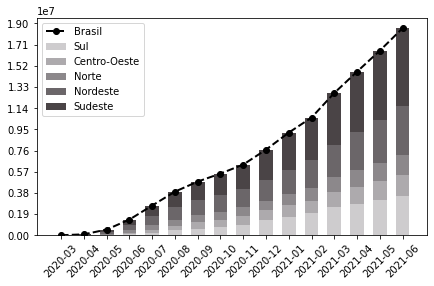

In [229]:
import matplotlib.pyplot as plt

dados_plot=pd.concat([Dados['Sul']['last_available_confirmed'],Dados['Centro-Oeste']['last_available_confirmed'],
     Dados['Norte']['last_available_confirmed'],Dados['Nordeste']['last_available_confirmed'],
     Dados['Sudeste']['last_available_confirmed'],Dados['Brasil']['last_available_confirmed']], axis=1)
dados_plot.columns=['Sul','Centro-Oeste','Norte','Nordeste','Sudeste','Brasil']
dados_plot=dados_plot.loc[dados_plot.index[range(16)]]

#### Fazendo o grafico
width = 0.60  
fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(dados_plot.index,dados_plot['Sul'],width, color="#CECCCE",align="center", label='Sul')
ax.bar(dados_plot.index,dados_plot['Centro-Oeste'],width,bottom=dados_plot['Sul'], color="#ADAAAD",align="center", label='Centro-Oeste')
ax.bar(dados_plot.index,dados_plot['Norte'],width, color="#8C888B",align="center", label='Norte'
,bottom=dados_plot['Sul']+dados_plot['Centro-Oeste'])
ax.bar(dados_plot.index,dados_plot['Nordeste'],width, color="#6B6669",align="center", label='Nordeste'
,bottom=dados_plot['Sul']+dados_plot['Centro-Oeste']+dados_plot['Norte'])
ax.bar(dados_plot.index,dados_plot['Sudeste'],width, color="#4A4446",align="center", label='Sudeste'
,bottom=dados_plot['Sul']+dados_plot['Centro-Oeste']+dados_plot['Norte']+dados_plot['Nordeste'])
#ax.set_ylabel("Scores")
#ax.set_title("Scores by group and gender")
#ax.set_xticks(range(17))
ax.set_xticklabels(dados_plot.index,rotation=45)
ax.set_yticks(np.arange(0,19000001,1900000))
ax.plot(dados_plot['Brasil'], "o--", lw=2, color="k", label="Brasil")
ax.legend()

dados_plot['Brasil'].max()


Coletando os indicados de saude no datasus http://www2.datasus.gov.br/DATASUS/index.php?area=02  
Numero de Leitos de UTI para Covid 19
Leitos complementares: UTI adulto II COVID-19, UTI pediátrica II COVID-19  
Período: Mai/2021

Médicos p/1.000 hab por Unidade da Federação e Ano
Período: censo 2010

Índice de envelhecimento, Proporção_de_idosos, Leitos existentes p/1.000 hab segundo Unidade da Federação
período: 2012

O banco foi organizado da seguinte forma.
+ Medicos: Número de Médicos, por mil habitantes, segundo categorias, em determinado espaço geográfico, no ano considerado.
+ Indice_de_Envelhecimento: Número de pessoas de 60 e mais anos de idade, para cada 100 pessoas menores de 15 anos de idade, na população residente em determinado espaço geográfico, no ano considerado. Valores elevados desse índice indicam que a transição demográfica encontra-se em estágio avançado.
+ Proporcao_de_idosos: Percentual de pessoas com 60 e mais anos de idade, na população total residente em determinado espaço geográfico, no ano considerado. Indica a participação relativa de idosos na população geral.
+ Leitos_Hospitalares: Número de leitos hospitalares existentes, por mil habitantes residentes, em determinado espaço geográfico, no ano considerado.
+ Leitos_UTI: Número de leitos de UTI para a Covid-19, em determinado espaço geográfico e tempo considerado.


In [265]:
from scipy.stats import spearmanr
from scipy.stats import kstest
from scipy.stats import norm

url='/content/drive/MyDrive/Colab Notebooks/PROGRAMAÇÃO ESTATÍSTICA COM PYTHON/Projeto/Indicadores de saude.csv'
Dados_Ind =pd.read_csv(url, index_col=0, parse_dates=True, sep=';',decimal=",")

Dados_Ind

,Medicos,Indice_de_envelhecimento,Proporcao_de_idosos,Leitos_Hospitalares,Leitos_UTI
Estado,,,,,
RO,1.03,26.4,7.2,2.68,337
AC,0.92,19.0,6.4,1.92,110
AM,1.07,18.2,6.0,1.67,365
RR,1.24,16.6,5.5,1.78,96
PA,0.77,22.6,7.0,1.98,803
AP,0.75,15.4,5.1,1.61,135
TO,0.99,29.4,8.5,1.70,222
MA,0.53,27.9,8.6,2.07,595
PI,0.93,39.9,10.6,2.56,400


In [264]:
## fazendo o summary dos dados acima
Dados_Ind.describe()

,Medicos,Indice_de_envelhecimento,Proporcao_de_idosos,Leitos_Hospitalares,Leitos_UTI
count,27.000000,27.000000,27.000000,27.0000,27.000000
mean,1.484074,37.377778,9.411111,2.2400,1161.333333
std,0.761281,13.303190,2.261948,0.3685,1471.938831
min,0.530000,15.400000,5.100000,1.6100,96.000000
25%,1.045000,28.650000,7.800000,1.9700,382.500000
50%,1.230000,39.000000,9.800000,2.2300,595.000000
75%,1.750000,46.100000,10.750000,2.4600,1503.500000
max,3.610000,65.400000,13.600000,2.9300,7372.000000


In [232]:
# da Tabela inicial vamos pegar as informações da Incidencia e da letalidade por estado
Dados_IC_Let=desc_pop.loc[Dados_Ind.index,['Incidencia','Letalidade']]

# Vamos verificar a normalidade da incidência
#H0 ter distribuição normal
# Letalidade 
normal=norm(loc=Dados_IC_Let['Letalidade'].mean(),scale=Dados_IC_Let['Letalidade'].var())
print('Letalidade')
print(kstest(Dados_IC_Let['Letalidade'], normal.cdf))
# Incidencia
normal1=norm(loc=Dados_IC_Let['Incidencia'].mean(),scale=Dados_IC_Let['Incidencia'].var())
print('Incidencia')
print(kstest(Dados_IC_Let['Incidencia'], normal1.cdf))

Letalidade
KstestResult(statistic=0.1692776851702723, pvalue=0.3811045238711211)
Incidencia
KstestResult(statistic=0.49976155471381734, pvalue=9.254896143224183e-07)


In [266]:
# Vamos calcular a correlação entre incidência e letalidade e os indicadores
Resultado_Cor=pd.DataFrame(index=['Medicos','Indice_de_envelhecimento','Proporcao_de_idosos',
              'Leitos_Hospitalares','Leitos_UTI'],columns=['Incidencia','Letalidade'])
# Pelo teste de spearmanr H0 não tem correlação
for i in Dados_IC_Let:
  print(i)
  for j in Dados_Ind:
    print(j)
    print(spearmanr(Dados_IC_Let[i],Dados_Ind[j]))
    #Resultado_Cor.loc[j,i], pvalue=spearmanr(Dados_IC_Let[i],Dados_Ind[j])

#print(Resultado_Cor)

print()
Dados_test=desc_pop.loc[Dados_Ind.index,['estimated_population','IAD','order_for_place']]
for a in Dados_IC_Let:
  print(a)
  for b in Dados_test:
    print(b)
    print(spearmanr(Dados_IC_Let[a],Dados_test[b]))

#### Para teste vamos ver uma correlação geral 
dd=pd.concat([Dados_IC_Let,Dados_Ind,Dados_test],axis=1)
dd.corr(method='spearman')

Incidencia
Medicos
SpearmanrResult(correlation=0.08548313334215142, pvalue=0.6716075979977405)
Indice_de_envelhecimento
SpearmanrResult(correlation=-0.26290076335877866, pvalue=0.18521122916100574)
Proporcao_de_idosos
SpearmanrResult(correlation=-0.35419847328244275, pvalue=0.06988423521077033)
Leitos_Hospitalares
SpearmanrResult(correlation=-0.11116201076300891, pvalue=0.5809494662853941)
Leitos_UTI
SpearmanrResult(correlation=-0.5400702245795209, pvalue=0.0036391918919019997)
Letalidade
Medicos
SpearmanrResult(correlation=0.18867348716231994, pvalue=0.3459426455564468)
Indice_de_envelhecimento
SpearmanrResult(correlation=0.26900763358778623, pvalue=0.17483546203266942)
Proporcao_de_idosos
SpearmanrResult(correlation=0.3010687022900764, pvalue=0.1270020089955394)
Leitos_Hospitalares
SpearmanrResult(correlation=0.33867766465982657, pvalue=0.08398153380254438)
Leitos_UTI
SpearmanrResult(correlation=0.5809800098218362, pvalue=0.0014842709070398714)

Incidencia
estimated_population
Spearm

,Incidencia,Letalidade,Medicos,Indice_de_envelhecimento,Proporcao_de_idosos,Leitos_Hospitalares,Leitos_UTI,IAD
Incidencia,1.000000,-0.587176,0.085483,-0.262901,-0.354198,-0.111162,-0.540070,-0.347786
Letalidade,-0.587176,1.000000,0.188673,0.269008,0.301069,0.338678,0.580980,0.614046
Medicos,0.085483,0.188673,1.000000,0.717753,0.581591,0.557863,0.559219,0.502519
Indice_de_envelhecimento,-0.262901,0.269008,0.717753,1.000000,0.963969,0.672316,0.804763,0.644580
Proporcao_de_idosos,-0.354198,0.301069,0.581591,0.963969,1.000000,0.656741,0.752862,0.619237
Leitos_Hospitalares,-0.111162,0.338678,0.557863,0.672316,0.656741,1.000000,0.549924,0.449534
Leitos_UTI,-0.540070,0.580980,0.559219,0.804763,0.752862,0.549924,1.000000,0.845978
IAD,-0.347786,0.614046,0.502519,0.644580,0.619237,0.449534,0.845978,1.000000
